In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dropout,Dense, Flatten,Conv2D,MaxPool2D

In [8]:
np.random.seed(123)
tf.random.set_seed(123)

In [25]:
train_data_path = "C:/Users/Hp/intel_image_dataset_model/archive_4/seg_train/seg_train"
test_data_path = "C:/Users/Hp/intel_image_dataset_model/archive_4/seg_test/seg_test"
pred_data_gen = "C:/Users/Hp/intel_image_dataset_model/archive_4/seg_pred/"

In [26]:
datagan = ImageDataGenerator(rescale=1/255)

In [27]:
batch_size_ = 100

In [28]:
train_datagan = datagan.flow_from_directory(train_data_path,target_size = (150,150),batch_size = batch_size_)
test_datagan = datagan.flow_from_directory(test_data_path,target_size = (150,150),batch_size = batch_size_)
pred_datagen = datagan.flow_from_directory(pred_data_gen,target_size = (150,150),batch_size = batch_size_)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.
Found 7301 images belonging to 1 classes.


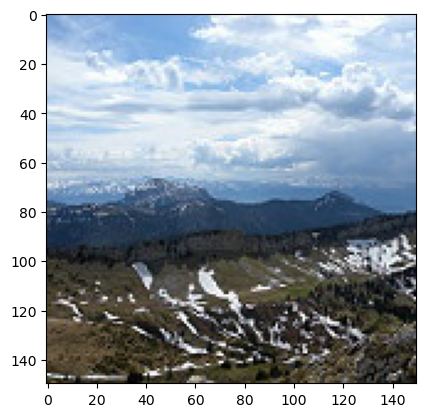

In [29]:
batch_1 = train_datagan.next()
plt.imshow(batch_1[0][12])

In [30]:
class_name = train_datagan.class_indices
class_name

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

# model

In [31]:
reg = tf.keras.regularizers.l2(0.001)

In [32]:
#  model architecture
model = keras.Sequential()
model.add(Conv2D(activation= "relu",filters = 16,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",input_shape = (150,150,3),name = "conv1"))
model.add(Dropout(0.25,name = "drop_1"))
model.add(Conv2D(activation= "relu",filters = 16,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv2"))
model.add(Dropout(0.25,name = "drop_2"))
model.add(MaxPool2D())
model.add(Conv2D(activation= "relu",filters = 32,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv3"))
model.add(Dropout(0.25,name = "drop_3"))
model.add(Conv2D(activation= "relu",filters = 32,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv4"))
model.add(Dropout(0.25,name = "drop_4"))
model.add(MaxPool2D())
model.add(Conv2D(activation= "relu",filters = 64,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv5"))
model.add(Dropout(0.25,name = "drop_5"))
model.add(Conv2D(activation= "relu",filters = 64,kernel_size = (3,3),kernel_regularizer=reg,strides = 1,padding = "same",name = "conv6"))
model.add(Dropout(0.25,name = "drop_6"))


model.add(Flatten(name = "flatten"))

model.add(Dense(units=128,activation="relu" , name ='hidden1',kernel_regularizer=reg))
model.add(Dropout(0.5 , name = "drop_7"))
model.add(Dense(units=6,activation="softmax" , name = "out_lay",kernel_regularizer=reg))


In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1 (Conv2D)              (None, 150, 150, 16)      448       
                                                                 
 drop_1 (Dropout)            (None, 150, 150, 16)      0         
                                                                 
 conv2 (Conv2D)              (None, 150, 150, 16)      2320      
                                                                 
 drop_2 (Dropout)            (None, 150, 150, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 75, 75, 16)        0         
 D)                                                              
                                                                 
 conv3 (Conv2D)              (None, 75, 75, 32)        4640      
                                                        

In [34]:
tf.keras.utils.plot_model(
    model,
    to_file='vgg_model.png',
    show_shapes=True,
    show_dtype=True,
    show_layer_names=True,
    show_layer_activations=True,
    dpi=100
)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [35]:
model.load_weights("C:/Users/Hp/intel_image_dataset_model/weighys_itel_image.h5")

In [36]:
# compile model
model.compile(loss= tf.losses.CategoricalCrossentropy(),
              optimizer = tf.optimizers.Adam(learning_rate=0.0001),
             metrics=tf.metrics.CategoricalAccuracy())

In [54]:
model_hist = model.fit(train_datagan,epochs=2,batch_size = batch_size_,
                       validation_data = test_datagan,verbose = 2)

Epoch 1/2
141/141 - 977s - loss: 0.5663 - categorical_accuracy: 0.8675 - val_loss: 0.7253 - val_categorical_accuracy: 0.8267 - 977s/epoch - 7s/step
Epoch 2/2
141/141 - 950s - loss: 0.5485 - categorical_accuracy: 0.8702 - val_loss: 0.7129 - val_categorical_accuracy: 0.8323 - 950s/epoch - 7s/step


C:\Users\Hp\AppData\Local\Temp\ipykernel_11992\1746287503.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r--" (-> color='r'). The keyword argument will take precedence.
  plt.plot(val_categorical_accuracy,'r--', color = "blue")
C:\Users\Hp\AppData\Local\Temp\ipykernel_11992\1746287503.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "--bo" (-> color='b'). The keyword argument will take precedence.
  plt.plot(categorical_accuracy,'--bo',color = "red")


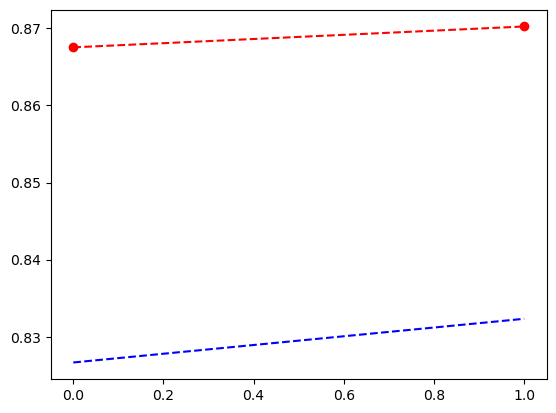

In [55]:
val_categorical_accuracy = model_hist.history["val_categorical_accuracy"]
categorical_accuracy = model_hist.history["categorical_accuracy"]
plt.plot(val_categorical_accuracy,'r--', color = "blue")
plt.plot(categorical_accuracy,'--bo',color = "red")
plt.show()

In [ ]:
model.save_weights("/content/drive/MyDrive/مبای ریاضی و هوش مصنوعی سرس کد ها/Neural Networks/Convolutional Neural Networks/intel image dataset/weighys_itel_image.h5")

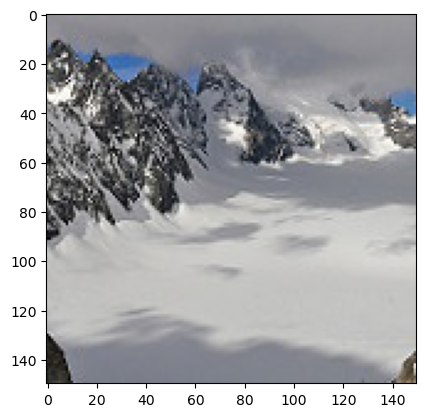

In [51]:
plt.imshow(pred_datagen[1][0][1])

In [53]:
model.predict(pred_datagen[1][0])

4/4 [==============================] - 1s 208ms/step


array([[7.88798869e-01, 4.51741478e-04, 5.06373690e-05, 3.16656406e-05,
        1.06668714e-02, 2.00000182e-01],
       [2.95037357e-03, 8.48344411e-04, 3.09402585e-01, 6.65791631e-01,
        2.05793250e-02, 4.27734340e-04],
       [7.11658722e-05, 2.63656344e-04, 1.43236937e-02, 2.67663971e-02,
        9.58387077e-01, 1.87924219e-04],
       [8.10092781e-04, 9.87210893e-04, 6.89909756e-02, 9.27469134e-01,
        1.71858305e-03, 2.39891197e-05],
       [1.01345556e-03, 1.71943312e-03, 7.55894005e-01, 2.12983444e-01,
        2.72716898e-02, 1.11795624e-03],
       [3.55925076e-02, 9.75039974e-03, 2.09511811e-04, 1.89449409e-07,
        7.92416104e-05, 9.54368055e-01],
       [2.68866032e-01, 2.65695639e-02, 1.27365650e-03, 1.21176226e-05,
        1.63684902e-03, 7.01641738e-01],
       [6.94265145e-06, 9.96926129e-01, 1.42293877e-03, 1.57001230e-03,
        6.71821545e-05, 6.74309103e-06],
       [6.96726085e-04, 1.10278826e-03, 2.25307345e-01, 3.96102935e-01,
        3.75999510e-01, 